# Challenge 4 (8 points) -- Advanced

* Use the data file "challenge3.gwf" with channels "H1:CHALLENGE3" and "L1:CHALLENGE3".
* These are real LIGO data from O2, though we've adjusted the time labels and 
  added some simulated signals.
* Any simulated signals have been added to both the H1 and L1 data
* All simulated signals have 0 spin and m1=m2, with m1 somewhere in the range 10-50 solar masses

1. Identify as many signals as you can.  Watch out!  These are real data, and so glitches may be
present.  Any correct detection is +1 point but any false alarms will count -1 point 
against your score.  For each signal you find, list:

 * The merger time
 * The SNR
 * Your estimate of the component masses

2. Identify as many glitches as you can.  Make a spectrogram of each one.

3. For each simulated BBH you found, use bilby to compute a posterior
   distribution for the mass. You can fix the spin and mass ratio to make
   this run faster.

## 1. Indentification of signals

### From `matched_filter`

In [1]:
from challenge4_script import challenge_matched_filter, p_value_calculator
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = [14,4]
import numpy as np

In [2]:
channel_name_arr = ["H1:CHALLENGE3", "L1:CHALLENGE3"]
mass_arr = range(10,51,10)

ts, psd_ts, snr_x, chisq_x, nsnr_x = challenge_matched_filter("challenge3_2048hz.gwf", channel_name_arr, mass_arr)

In [4]:
# for mass in mass_arr:
#     plt.figure(figsize=[14, 4])
#     for cname in channel_name_arr:
#         plt.hist(nsnr_x[cname][mass], bins=1000, label=cname)
#         plt.axvline(nsnr_x[cname][mass].mean()+nsnr_x[cname][mass].std(), linestyle='--', linewidth=0.5, color='red')
#     plt.title(f'nSNR values histogram for mass: {mass}')
#     plt.grid()
#     plt.xlabel('Signal-to-noise (SNR)')
#     plt.legend()
#     plt.show()

The snr are not gaussian, but we take approximation that, it is so

In [5]:
factor = 7

# %matplotlib widget

# for mass in mass_arr:
#     # plt.figure(figsize=[14, 4])
#     # for cname in channel_name_arr:
#     #     plt.plot(snr_x[cname][mass].sample_times, abs(snr_x[cname][mass]), label=cname)
#     # plt.title('SNR Time Series')
#     # plt.grid()
#     # plt.xlabel('Time (s)')
#     # plt.ylabel('Signal-to-noise (SNR)')
#     # plt.legend()
#     # plt.show()

#     # Plot the new SNR timeseries
#     plt.figure(figsize=[14, 4])
#     for cname, color in zip(channel_name_arr, ['red', 'blue']):
#         plt.plot(snr_x[cname][mass].sample_times, nsnr_x[cname][mass], label=cname)
#         plt.axhline(nsnr_x[cname][mass].mean()+nsnr_x[cname][mass].std()*factor, linewidth=0.5, color=color, linestyle='--')
#     plt.title(f'NewSNR Timeseries for mass {mass}')
#     plt.grid()
#     plt.xlabel('Time (s)')
#     plt.ylabel('Re-weighted Signal-to-noise')
#     plt.legend()
#     plt.show()

#     # print("Mass: {}. We found a signal at {}s with SNR {}".format(mass, snr_x[cname][mass].sample_times[peak_idx[cname][mass]],
#     #                                                                nsnr_x[cname][mass][peak_idx[cname][mass]]))

In [3]:
# We consider peaks to be signal if it's above 5sigma level (mean+std*factor)
factor = 7

peak_idx = {}
for cname in channel_name_arr:
    peak_idx[cname] = {}
    for mass in mass_arr:
        sigma = np.std(nsnr_x[cname][mass])
        bool_arr = nsnr_x[cname][mass] > (nsnr_x[cname][mass].mean() + nsnr_x[cname][mass].std()*factor)
        nsnr_x_peaks = nsnr_x[cname][mass][bool_arr]
        #// print(nsnr_x_peaks.shape)
        peak_idx[cname][mass] = []
        for peaks in nsnr_x_peaks:
            peak_idx[cname][mass].append(np.where(nsnr_x[cname][mass] == peaks)[0][0])

        # #? to eradicate nearby points and take end points (indices)
        peak_idxx = []
        peak_idxx.append(peak_idx[cname][mass][0])
        for i in range(len(peak_idx[cname][mass])-1):
            if np.diff(peak_idx[cname][mass])[i] > 1:
                peak_idxx.append(peak_idx[cname][mass][i])
                peak_idxx.append(peak_idx[cname][mass][i+1])
        peak_idxx.append(peak_idx[cname][mass][-1])
        peak_idx[cname][mass] = peak_idxx

        # #? to take the indices of the maxima/peaks
        peak_idxx = []
        for i in range(0, len(peak_idx[cname][mass]), 2):
            try:
                tmp_peak_idx = nsnr_x[cname][mass][peak_idx[cname][mass][i]:peak_idx[cname][mass][i+1]].argmax()
            except:
                tmp_peak_idx = 0
            # print(tmp_peak_idx)
            peak_idxx.append(peak_idx[cname][mass][i]+tmp_peak_idx)
        peak_idx[cname][mass] = peak_idxx


In [4]:
peak_idx

{'H1:CHALLENGE3': {10: [2536416],
  20: [2954968],
  30: [839097, 1120697, 2954964, 3289283],
  40: [839094, 1120694, 2954962, 3289280],
  50: [839091, 1120691, 2954959, 3289277]},
 'L1:CHALLENGE3': {10: [2536416],
  20: [2954969],
  30: [839096, 1120696, 3289283],
  40: [1120693, 2954962, 3289279],
  50: [1120690, 2954958, 3289276]}}

In [8]:
# %matplotlib widget

# for mass in mass_arr:
#     # Plot the new SNR timeseries
#     plt.figure(figsize=[14, 4])
#     for cname, color in zip(channel_name_arr, ['red', 'blue']):
#         plt.plot(snr_x[cname][mass].sample_times, nsnr_x[cname][mass], label=cname)
#         plt.axhline(nsnr_x[cname][mass].mean()+nsnr_x[cname][mass].std()*factor, linewidth=0.5, color=color, linestyle='--')
#         for peak in peak_idx[cname][mass]:
#             plt.axvline(snr_x[cname][mass].sample_times[peak], color=color, linestyle='--', linewidth=0.5)
#     plt.title(f'NewSNR Timeseries for mass {mass}')
#     plt.grid()
#     plt.xlabel('Time (s)')
#     plt.ylabel('Re-weighted Signal-to-noise')
#     plt.legend()
#     plt.show()

#     print(f"\n\nMass: {mass}")
#     for cname in channel_name_arr:
#         print(f"\nChannel: {cname}")
#         for idx in peak_idx[cname][mass]:
#             print("We found a signal at {}s with SNR {}".format(snr_x[cname][mass].sample_times[idx],
#                                                                 nsnr_x[cname][mass][idx]))

### Checking of individual signals (manually)

In [5]:
import numpy
from pycbc.detector import Detector

# Calculate the time of flight between the Virgo detectors and each LIGO observatory
d = Detector('L1')
tof = d.light_travel_time_to_detector(Detector("H1"))

# Record the time of the peak in the LIGO observatories
ptime = {}

for cname in channel_name_arr:
    ptime[cname] = {} 
    for mass in mass_arr:
        ptime[cname][mass] = snr_x[cname][mass].sample_times[peak_idx[cname][mass]]

In [6]:
ptime

{'H1:CHALLENGE3': {10: array([2483.96875]),
  20: array([2892.7109375]),
  30: array([ 826.43066406, 1101.43066406, 2892.70703125, 3219.19042969]),
  40: array([ 826.42773438, 1101.42773438, 2892.70507812, 3219.1875    ]),
  50: array([ 826.42480469, 1101.42480469, 2892.70214844, 3219.18457031])},
 'L1:CHALLENGE3': {10: array([2483.96875]),
  20: array([2892.71191406]),
  30: array([ 826.4296875 , 1101.4296875 , 3219.19042969]),
  40: array([1101.42675781, 2892.70507812, 3219.18652344]),
  50: array([1101.42382812, 2892.70117188, 3219.18359375])}}

In [10]:
# %matplotlib widget

# for mass in mass_arr:
#     # Plot the new SNR timeseries
#     plt.figure(figsize=[14, 4])
#     for cname, color in zip(channel_name_arr, ['tab:blue', 'tab:orange']):
#         plt.plot(snr_x[cname][mass].sample_times, nsnr_x[cname][mass], label=cname)
#         plt.axhline(nsnr_x[cname][mass].mean()+nsnr_x[cname][mass].std()*factor, linewidth=0.5, color=color, linestyle='--')
#         for i in range(len(peak_idx[cname][mass])):
#             plt.axvline(snr_x[cname][mass].sample_times[peak_idx[cname][mass][i]], color=color, linestyle='--', linewidth=0.5)


#             # shade the region around each Hanford peak that could have a peak in Livingston if from
#             # an astrophysical source
#             if cname != 'L1:CHALLENGE3':
#                 plt.axvspan(ptime[cname][mass][i] - tof, ptime[cname][mass][i] + tof, alpha=0.2, color=color)


#     plt.title(f'NewSNR Timeseries for mass {mass}')
#     plt.grid()
#     plt.xlabel('Time (s)')
#     plt.ylabel('Re-weighted Signal-to-noise')
#     plt.xlim( snr_x[cname][mass].sample_times[peak_idx[cname][mass][0]] - tof - 10,
#              snr_x[cname][mass].sample_times[peak_idx[cname][mass][-1]] + tof + 10  )
#     plt.legend()
#     plt.show()

#     print(f"\n\nMass: {mass}")
#     for cname in channel_name_arr:
#         print(f"\nChannel: {cname}")
#         for idx in peak_idx[cname][mass]:
#             print("We found a signal at {}s with SNR {}".format(snr_x[cname][mass].sample_times[idx],
#                                                                 nsnr_x[cname][mass][idx]))


In [11]:
peak_idx

{'H1:CHALLENGE3': {10: [2536416],
  20: [2954968],
  30: [839097, 1120697, 2954964, 3289283],
  40: [839094, 1120694, 2954962, 3289280],
  50: [839091, 1120691, 2954959, 3289277]},
 'L1:CHALLENGE3': {10: [2536416],
  20: [2954969],
  30: [839096, 1120696, 3289283],
  40: [1120693, 2954962, 3289279],
  50: [1120690, 2954958, 3289276]}}



Mass: 10


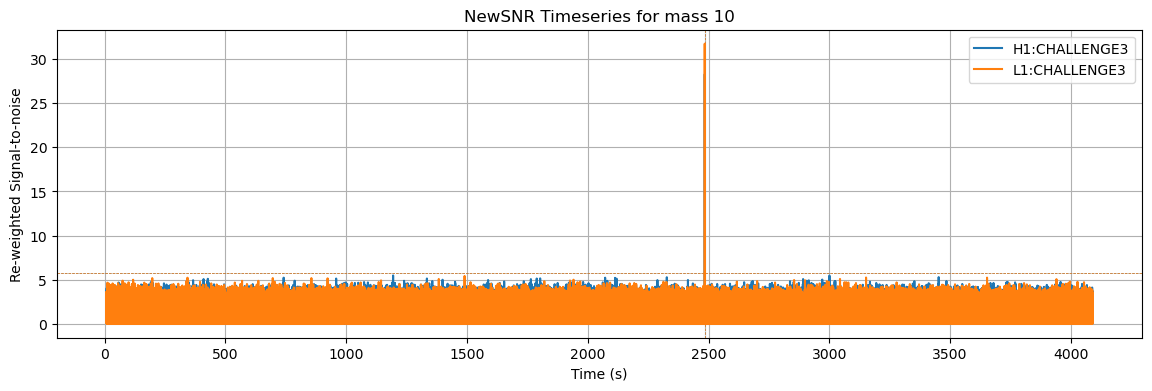

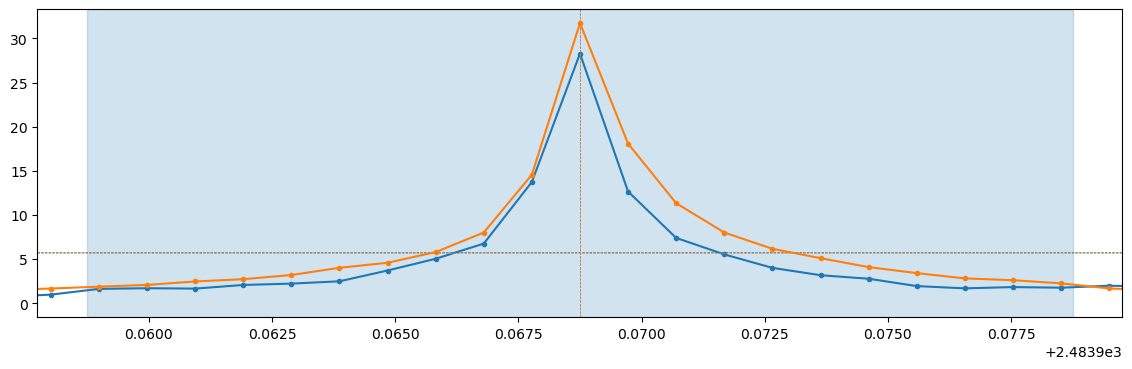


Channel: H1:CHALLENGE3
We found a signal at 2483.96875s with SNR 28.28448553173017

Channel: L1:CHALLENGE3
We found a signal at 2483.96875s with SNR 31.739268062475134


Mass: 20


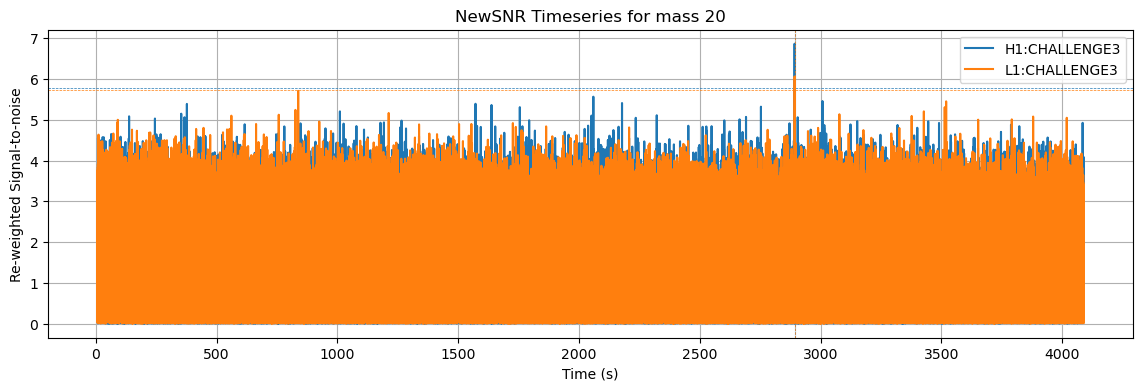

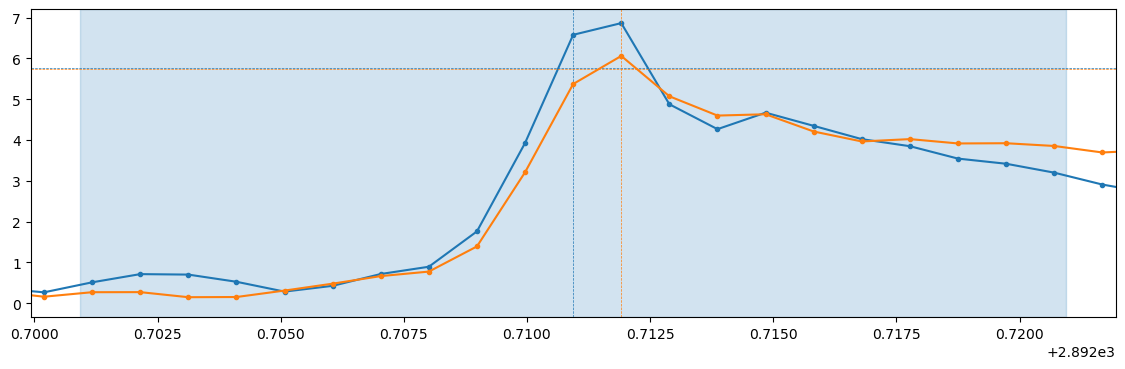


Channel: H1:CHALLENGE3
We found a signal at 2892.7109375s with SNR 6.578091677489226

Channel: L1:CHALLENGE3
We found a signal at 2892.7119140625s with SNR 6.059981636440483


Mass: 30


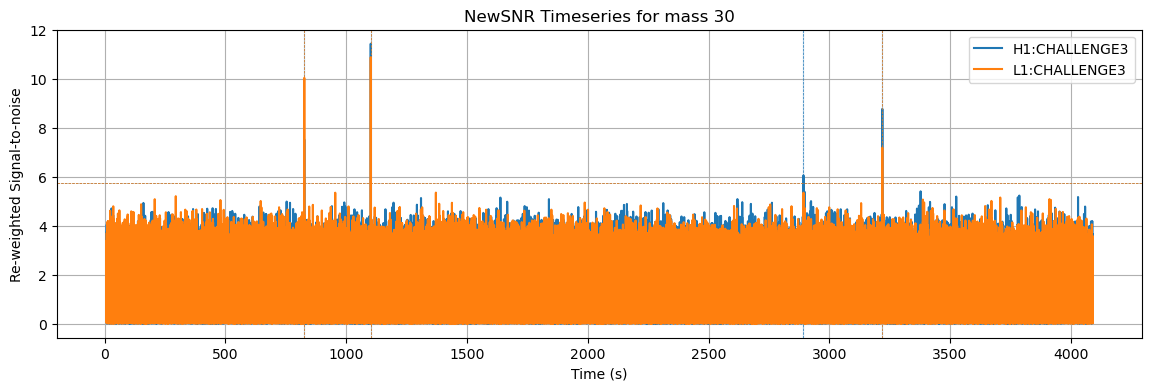

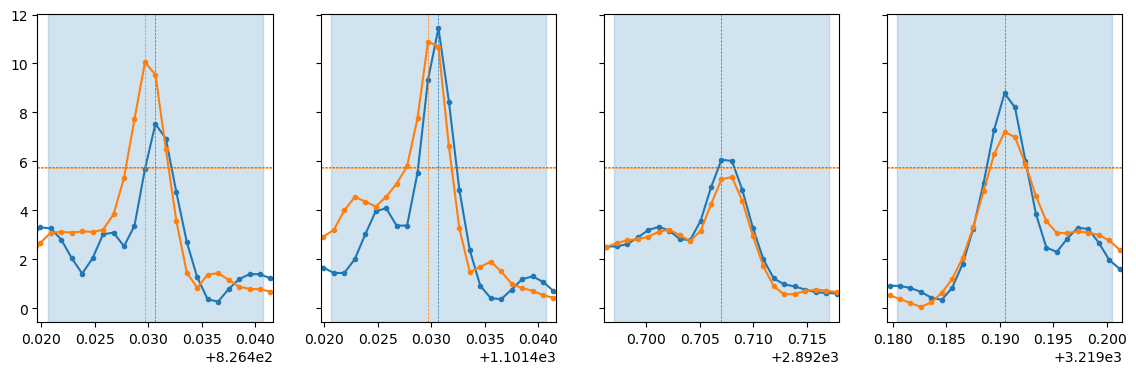


Channel: H1:CHALLENGE3
We found a signal at 826.4306640625s with SNR 7.5300583889958785
We found a signal at 1101.4306640625s with SNR 11.445697430314773
We found a signal at 2892.70703125s with SNR 6.064870566056906
We found a signal at 3219.1904296875s with SNR 8.782210727043008

Channel: L1:CHALLENGE3
We found a signal at 826.4296875s with SNR 10.049741490481667
We found a signal at 1101.4296875s with SNR 10.892547681673634
We found a signal at 3219.1904296875s with SNR 7.195647357439587


Mass: 40


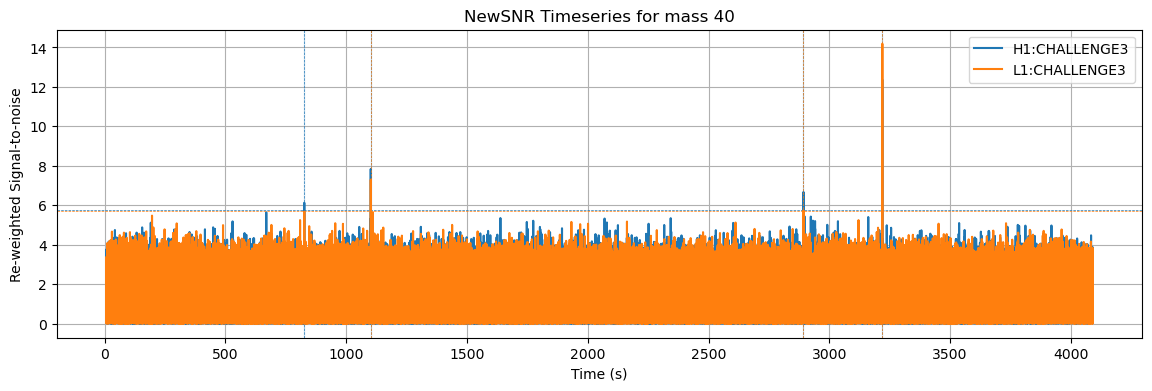

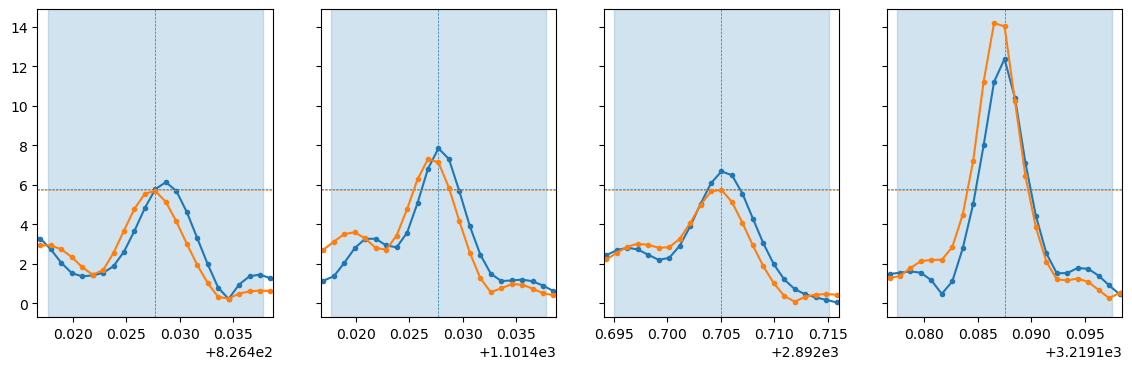


Channel: H1:CHALLENGE3
We found a signal at 826.427734375s with SNR 5.779802648685978
We found a signal at 1101.427734375s with SNR 7.842394161087491
We found a signal at 2892.705078125s with SNR 6.675368774950851
We found a signal at 3219.1875s with SNR 12.369725674752933

Channel: L1:CHALLENGE3
We found a signal at 1101.4267578125s with SNR 7.299252923431131
We found a signal at 2892.705078125s with SNR 5.740444388792039
We found a signal at 3219.1865234375s with SNR 14.188199880099932


Mass: 50


: 

: 

In [14]:
%matplotlib inline

#! This script can work only when `channel_name_arr[0]` has maximum peaks for all cases, which is the case here (Hanford having more peaks)

for mass in mass_arr:
    # if mass!=50:
    #     continue
    print(f"\n\nMass: {mass}")
    
    # Plot the new SNR timeseries
    fig1, ax1 = plt.subplots(figsize=[14, 4])
    # if len(peak_idx[channel_name_arr[0]][mass]) > 1:
    fig, ax = plt.subplots(1, len(peak_idx[channel_name_arr[0]][mass]), figsize=[14,4], sharey=True)

    for cname, color in zip(channel_name_arr, ['tab:blue', 'tab:orange']):
        ax1.plot(snr_x[cname][mass].sample_times, nsnr_x[cname][mass], label=cname)
        ax1.axhline(nsnr_x[cname][mass].mean()+nsnr_x[cname][mass].std()*factor, linewidth=0.5, color=color, linestyle='--')
        for i in range(len(peak_idx[cname][mass])):
            ax1.axvline(snr_x[cname][mass].sample_times[peak_idx[cname][mass][i]], color=color, linestyle='--', linewidth=0.5)

            # shade the region around each Hanford peak that could have a peak in Livingston if from
            # an astrophysical source
            if cname != 'L1:CHALLENGE3':
                ax1.axvspan(ptime[cname][mass][i] - tof, ptime[cname][mass][i] + tof, alpha=0.2, color=color)
    
        # for the subplots showing zoomed views
        for iax, i in zip(np.atleast_1d(ax), range(len(np.atleast_1d(ax)))):
            iax.plot(snr_x[cname][mass].sample_times, nsnr_x[cname][mass], '.-', label=cname)
            iax.axhline(nsnr_x[cname][mass].mean()+nsnr_x[cname][mass].std()*factor, linewidth=0.5, color=color, linestyle='--')
            try:
                # print(cname, peak_idx[cname][mass][i], snr_x[cname][mass].sample_times[peak_idx[cname][mass][i]])
                iax.axvline(snr_x[cname][mass].sample_times[peak_idx[cname][mass][i]], color=color, linestyle='--', linewidth=0.5)
            except:
                pass

            if cname != 'L1:CHALLENGE3':
                iax.set_xlim( snr_x[cname][mass].sample_times[peak_idx[cname][mass][i]] - tof - 0.001,
                        snr_x[cname][mass].sample_times[peak_idx[cname][mass][i]] + tof + 0.001  )
                iax.axvspan(ptime[cname][mass][i] - tof, ptime[cname][mass][i] + tof, alpha=0.2, color=color)


    ax1.set_title(f'NewSNR Timeseries for mass {mass}')
    ax1.grid()
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Re-weighted Signal-to-noise')
    # ax1.set_xlim( snr_x['H1:CHALLENGE3'][mass].sample_times[peak_idx['H1:CHALLENGE3'][mass][0]] - tof - 0.01,
    #          snr_x['H1:CHALLENGE3'][mass].sample_times[peak_idx['H1:CHALLENGE3'][mass][-1]] + tof + 0.01  )
    ax1.legend()
    plt.show()


    for cname in channel_name_arr:
        print(f"\nChannel: {cname}")
        for idx in peak_idx[cname][mass]:
            print("We found a signal at {}s with SNR {}".format(snr_x[cname][mass].sample_times[idx],
                                                                nsnr_x[cname][mass][idx]))


In [14]:
peak_idx["H1:CHALLENGE3"][50], peak_idx["L1:CHALLENGE3"][50]

([839091, 1120691, 2954959, 3289277], [1120690, 2954958, 3289276])

In [15]:
for i in range(10):
    plt.close()

In [27]:
# def p_value_calculator(nsnr, sidx, window_size):
#     """window_size need to be in units of indices, i.e., multiply by sample_rate"""
#     # Calculate the span of time that a Virgo peak could in principle happen in from time of flight
#     # considerations.
#     # start = ptime['H1'] - tof['H1']
#     # end = ptime['L1'] + tof['L1']

#     # convert the times to indices along with how large the region is in number of samples
#     # window_size = int((end - start) * snr['V1'].sample_rate)
#     # sidx = int((start - snr['V1'].start_time) * snr['V1'].sample_rate)
#     sidx = np.atleast_1d(sidx)
#     eidx = sidx + window_size

#     # Calculate the "on-source" peak re-weighted (newsnr) statistic value.
#     onsource = []
#     for i in range(len(sidx)):
#         onsource.append(nsnr[sidx[i]:eidx[i]].max())

#     peaks = []
#     i = 0
#     while i + window_size < len(nsnr):
#         p = nsnr[i:i+window_size].max()
#         peaks.append(p)
#         i += window_size
        
#         # Skip past the onsource time
#         for sidx_i in sidx:
#             if abs(i - sidx_i) < window_size:
#                 i += window_size * 2
        
#     peaks = np.array(peaks)


#     # The p-value is just the number of samples observed in the background with a 
#     # value equal or higher than the onsource divided by the number of samples.
#     # We can make the mapping between statistic value and p-value using our background
#     # samples.
#     pcurve = np.arange(1, len(peaks)+1)[::-1] / float(len(peaks))
#     peaks.sort()

#     pvalue = []
#     for i in range(len(sidx)):
#         pvalue.append((peaks > onsource[i]).sum() / float(len(peaks)))

#     plt.figure(figsize=[6, 5])
#     plt.scatter(
#         peaks, pcurve, label='Off-source (Noise Background)', color='black', s=1)

#     for i in range(len(onsource)):
#         plt.axvline(onsource[i], label='On-source', color='red')
#         plt.axhline(pvalue[i], color='red')

#     plt.legend()
#     plt.yscale('log')
#     plt.grid()
#     plt.title(f"p-value estimation for channel {cname} with mass {mass}")
#     # plt.ylim(1e-3, 1e0)
#     plt.ylabel('p-value')
#     plt.xlabel('Re-weighted Signal-to-noise')
#     # plt.xlim(2, 5)
#     plt.show()
    
#     return pvalue


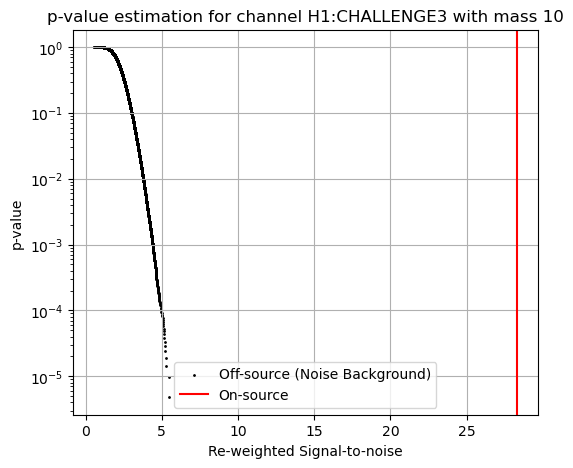

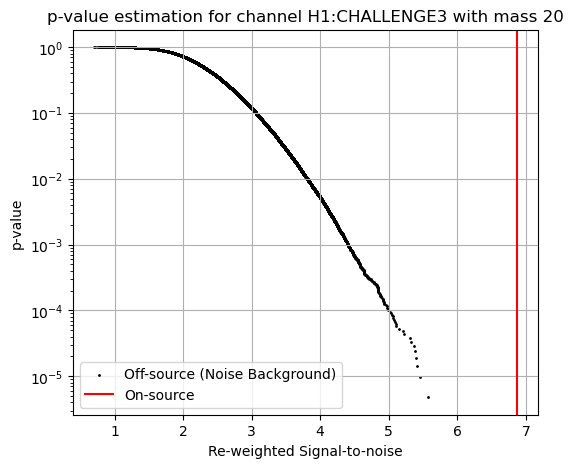

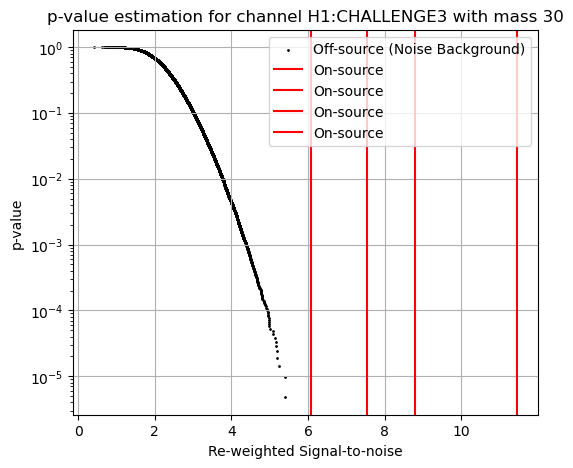

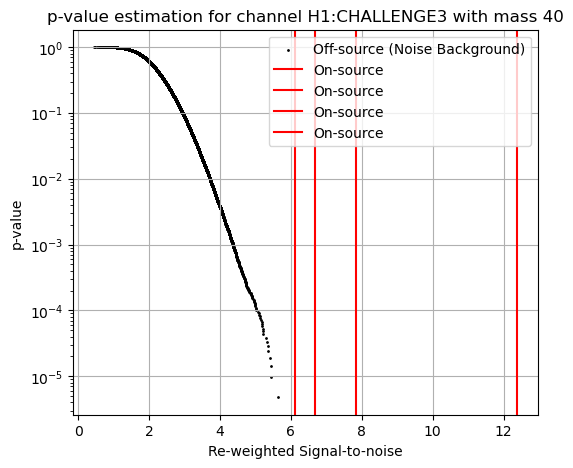

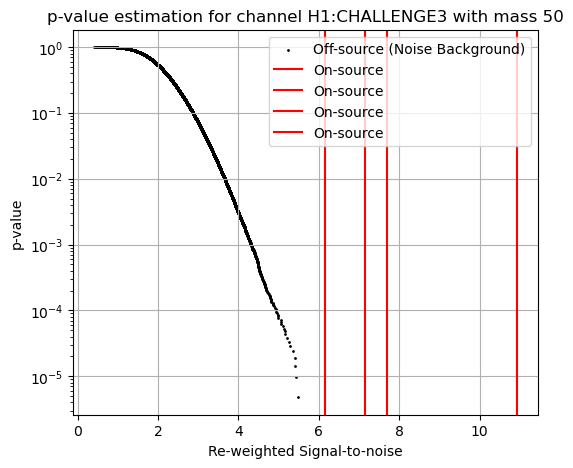

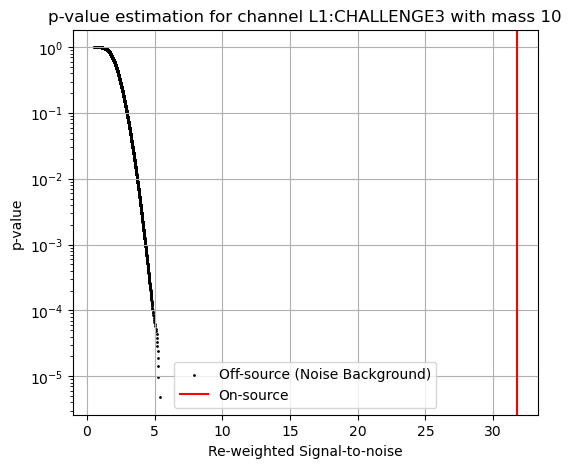

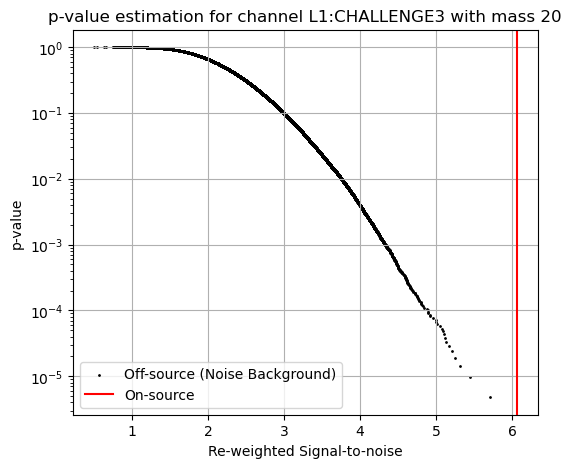

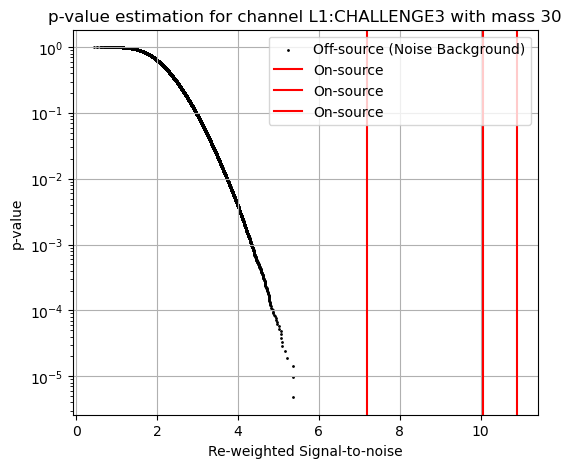

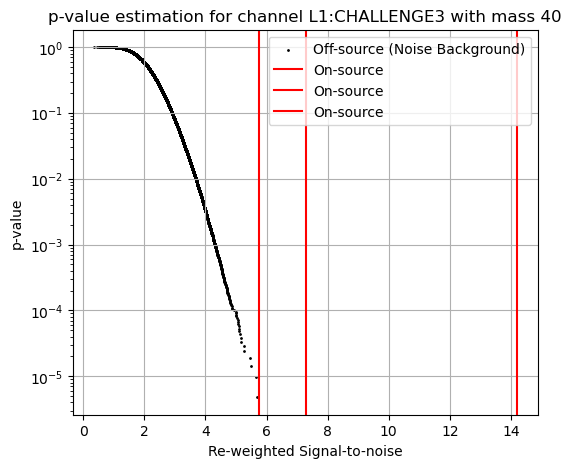

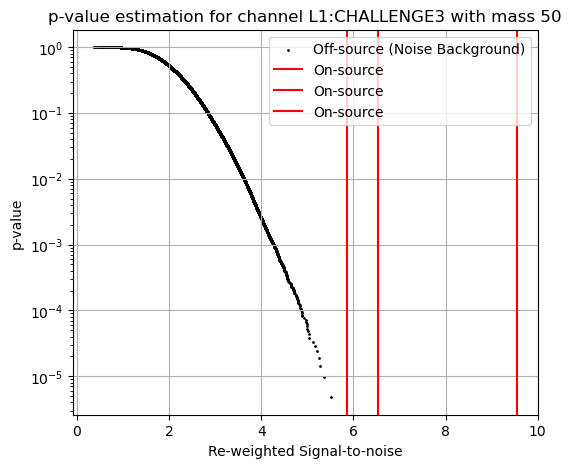

In [7]:
window_size = int(2*tof * ts[cname].sample_rate)        # same for all

p_val= {}
for cname in channel_name_arr:
    p_val[cname] = {}
    for mass in mass_arr:
        sidx = np.array(peak_idx[cname][mass]) - int(window_size/2)
        p_val[cname][mass] = p_value_calculator(nsnr_x[cname][mass], sidx, window_size, plot=True, channel_name=cname, mass=mass)
        
# 0 is not unexpected, as we have chosen all the peaks to be greater than any noise peak values.

In [9]:
p_val

{'H1:CHALLENGE3': {10: [0.0],
  20: [0.0],
  30: [0.0, 0.0, 0.0, 0.0],
  40: [0.0, 0.0, 0.0, 0.0],
  50: [0.0, 0.0, 0.0, 0.0]},
 'L1:CHALLENGE3': {10: [0.0],
  20: [0.0],
  30: [0.0, 0.0, 0.0],
  40: [0.0, 0.0, 0.0],
  50: [0.0, 0.0, 0.0]}}

## Spectrogram of all the signals

In [12]:
from gwpy.timeseries import TimeSeries

H1strain = TimeSeries.read("challenge3_2048hz.gwf", "H1:CHALLENGE3")
L1strain = TimeSeries.read("challenge3_2048hz.gwf", "L1:CHALLENGE3")

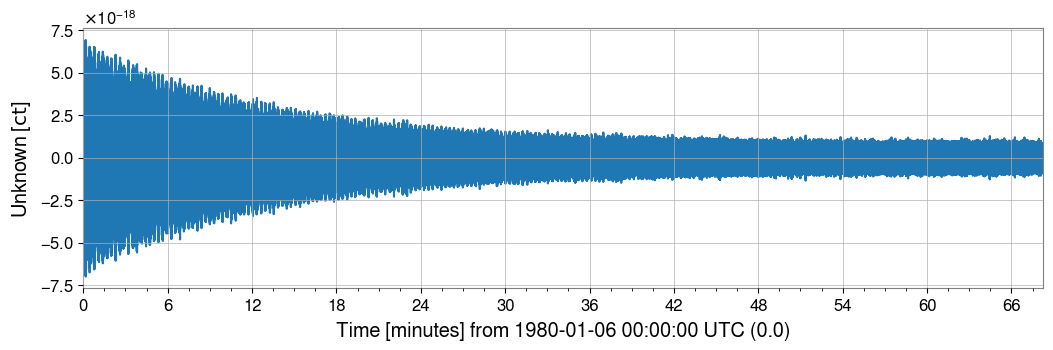

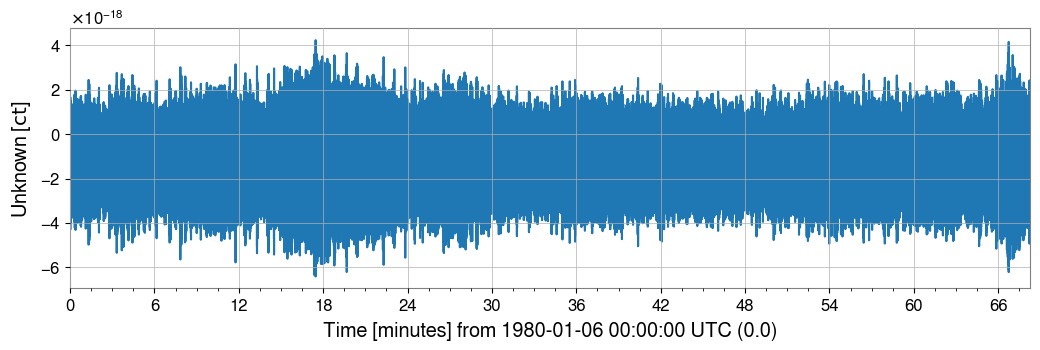

In [18]:
plot = H1strain.plot()
plot = L1strain.plot()


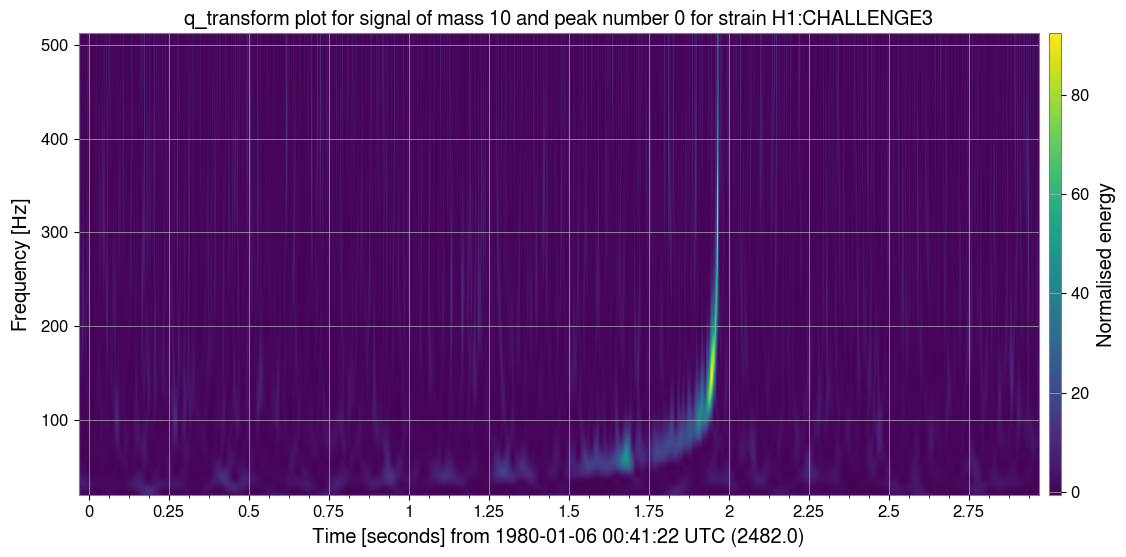

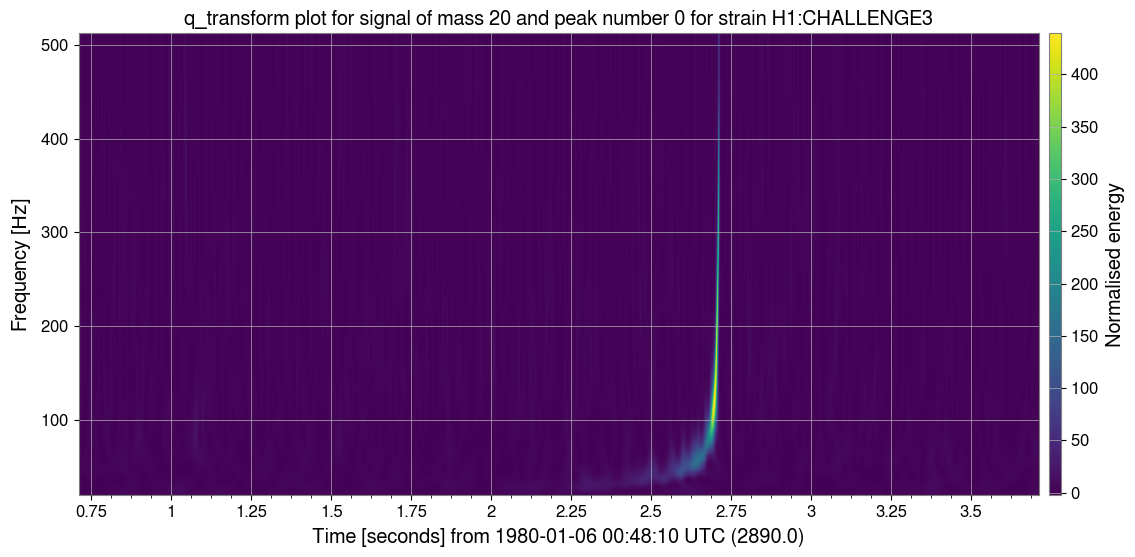

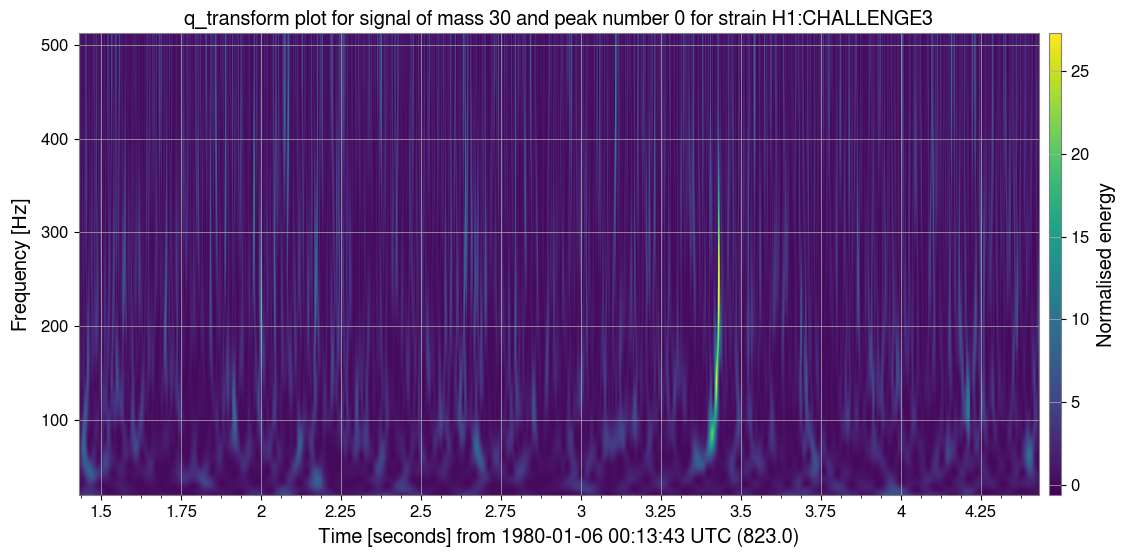

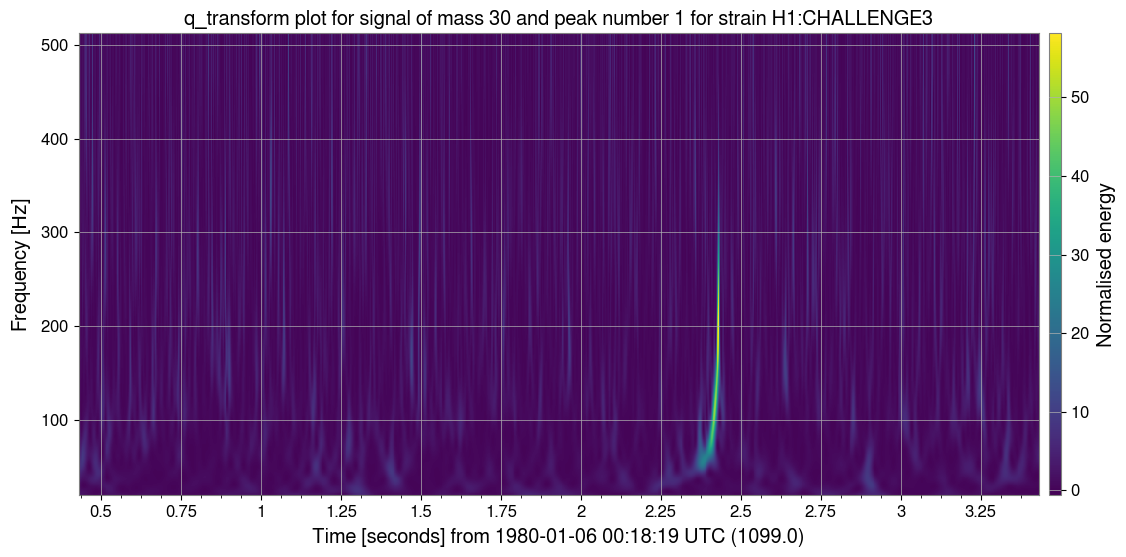

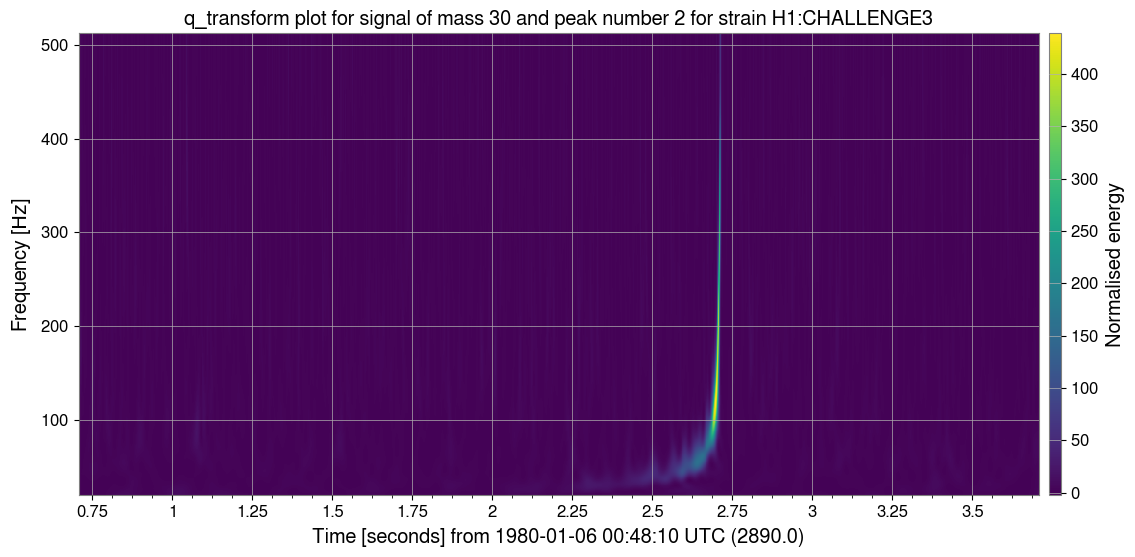

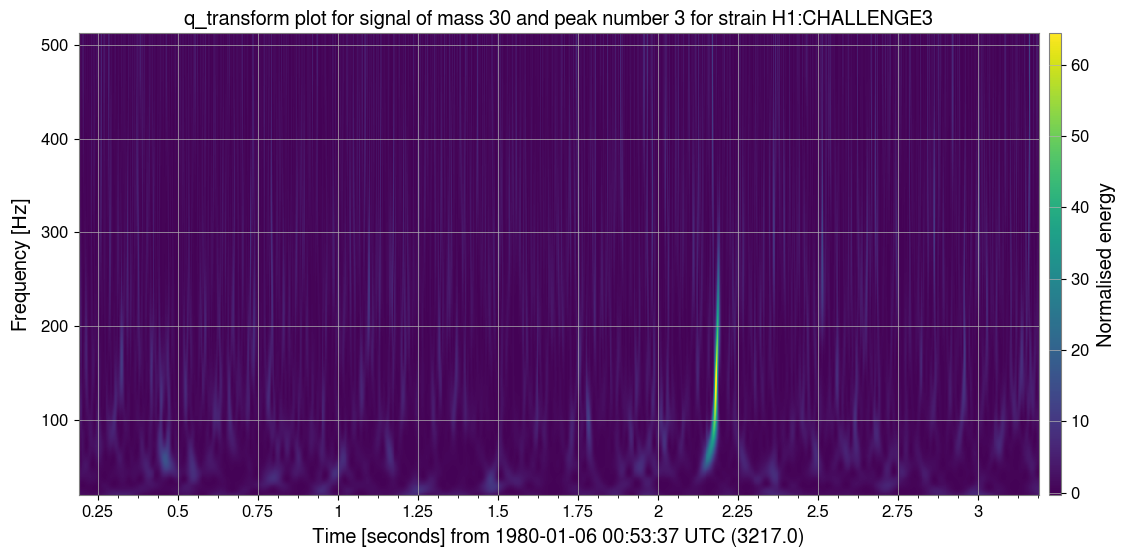

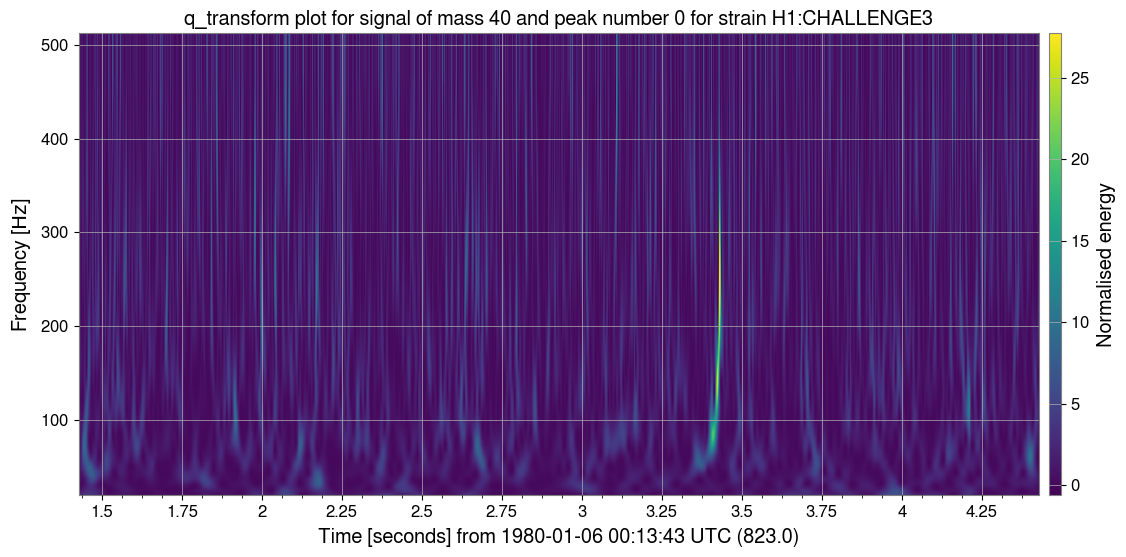

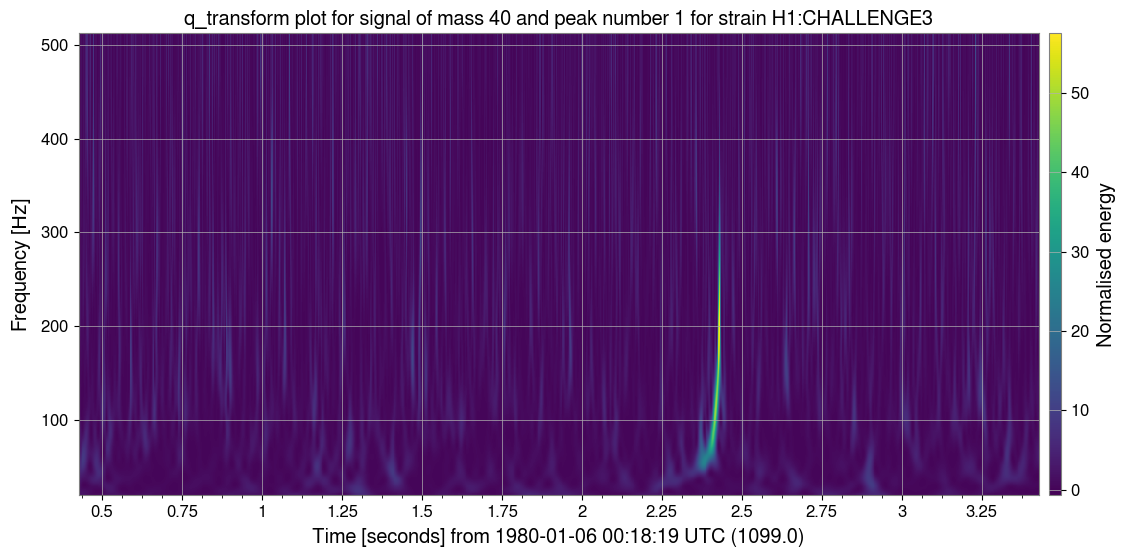

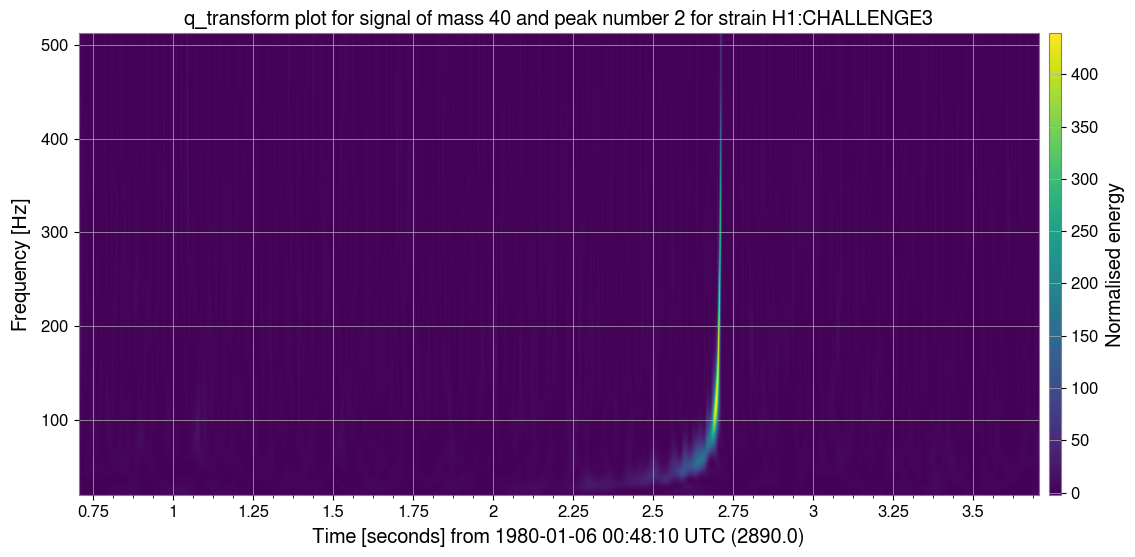

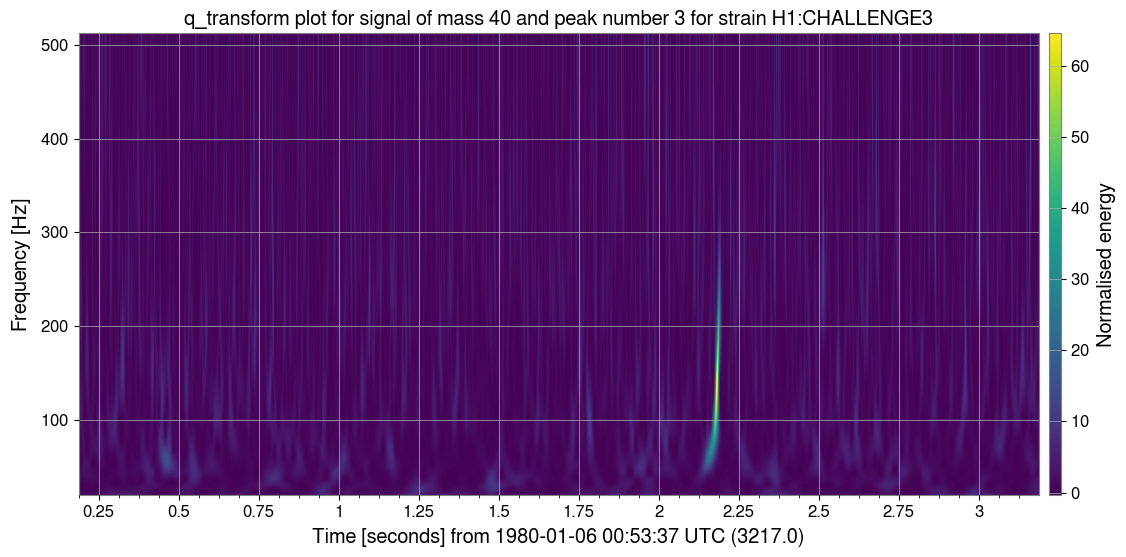

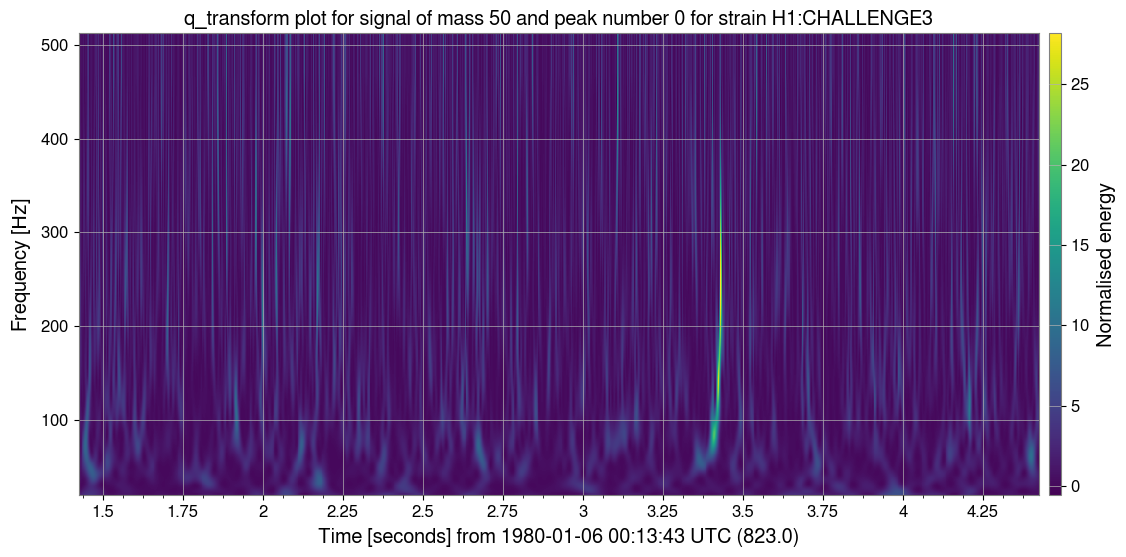

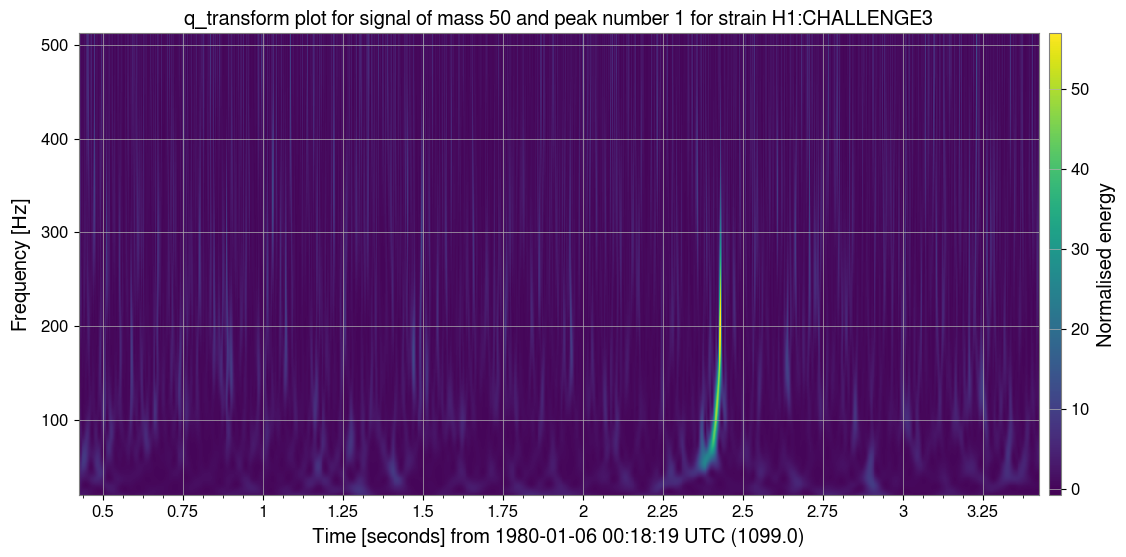

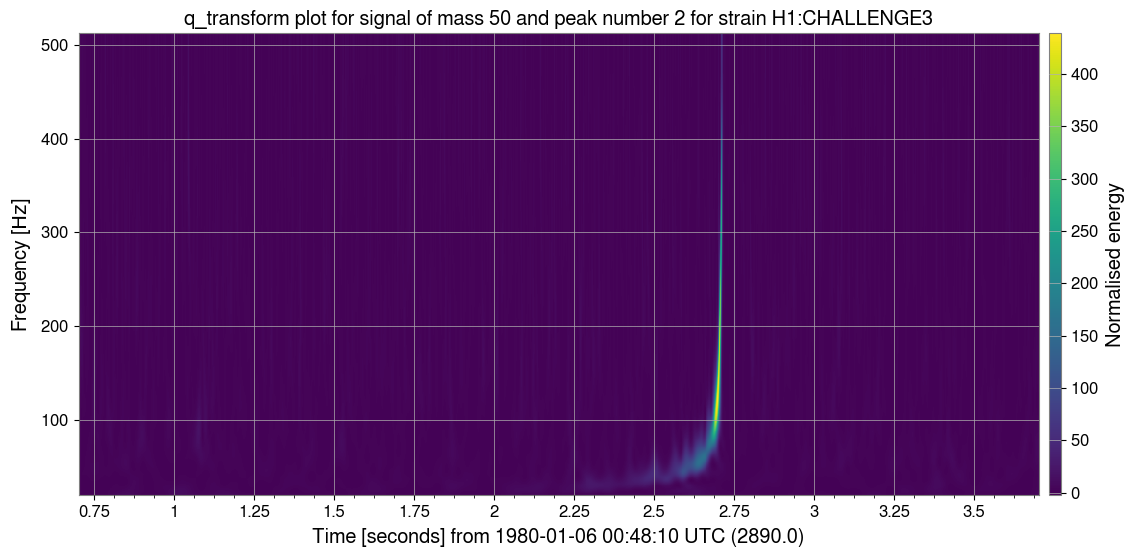

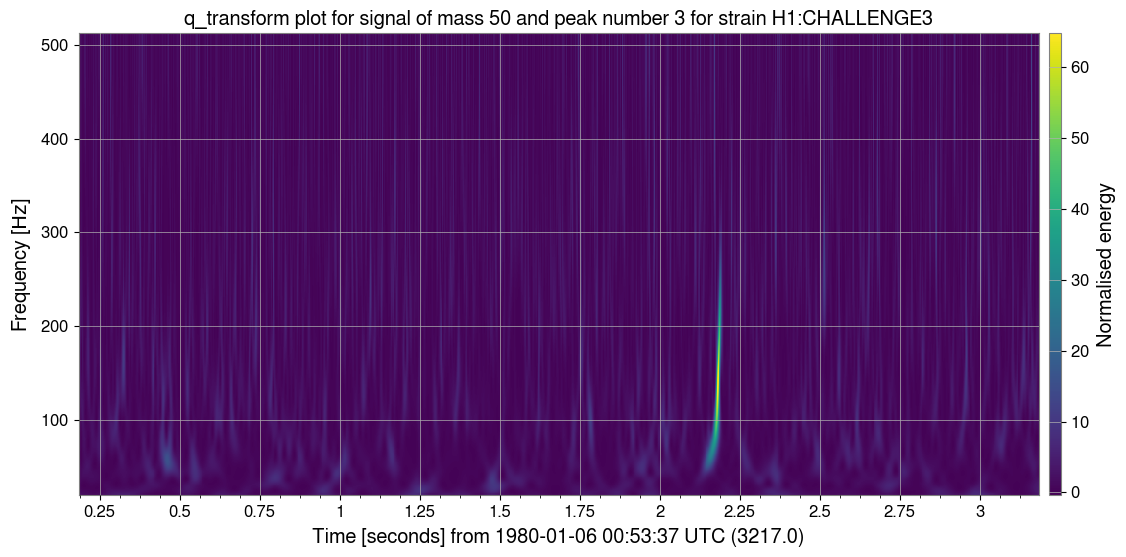

In [14]:
cname = 'H1:CHALLENGE3'

for mass in mass_arr:
    i = 0
    for peak in peak_idx[cname][mass]:
        # plot = H1strain.q_transform(frange=[20,512], outseg=[snr_x[cname][mass].sample_times[peak-window_size],
        #                                                      snr_x[cname][mass].sample_times[peak+window_size]]).plot()
        plot = H1strain.q_transform(frange=[20,512], outseg=[snr_x[cname][mass].sample_times[peak]-2,
                                                             snr_x[cname][mass].sample_times[peak]+1]).plot()
        plot.colorbar(label="Normalised energy")   
        ax = plot.gca()
        ax.set_title(f"q_transform plot for signal of mass {mass} and peak number {i} for strain {cname}")
        i += 1

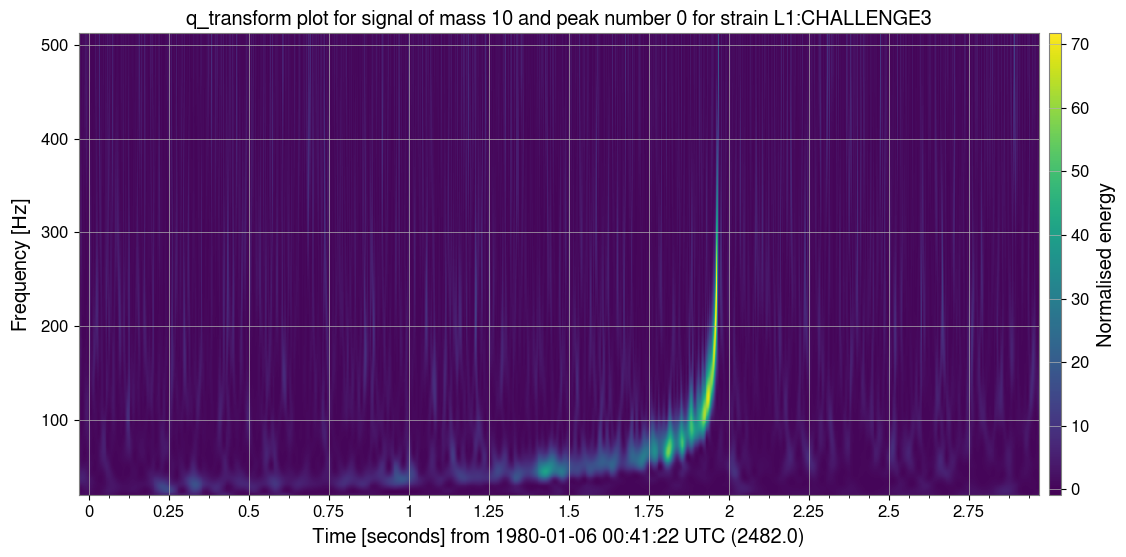

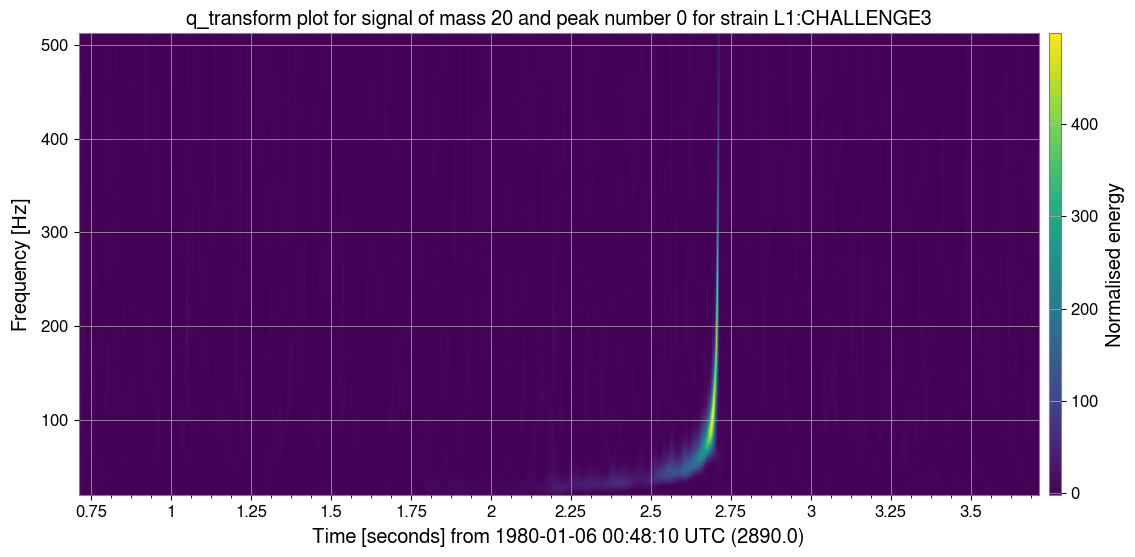

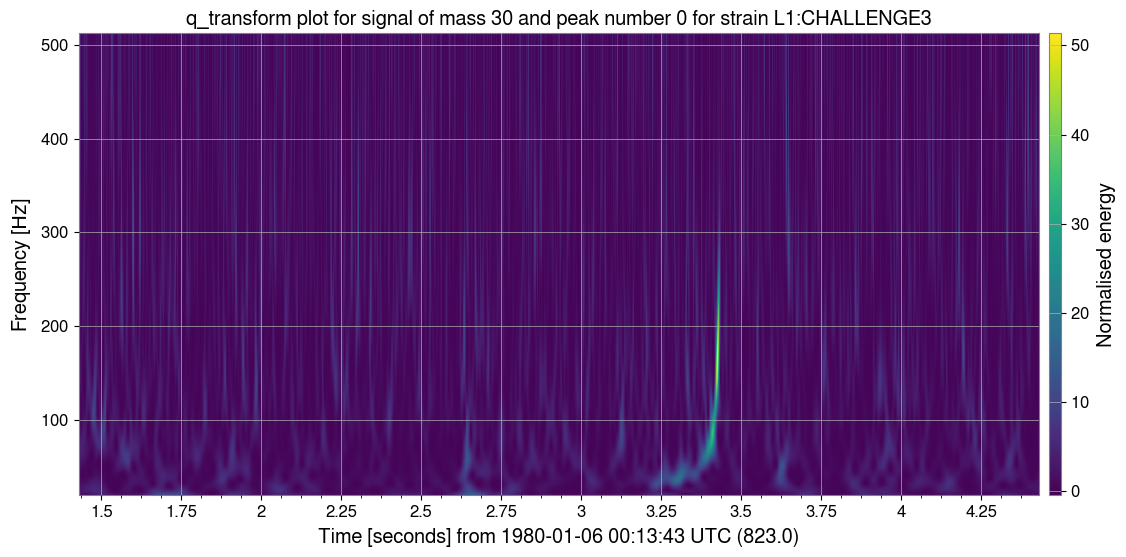

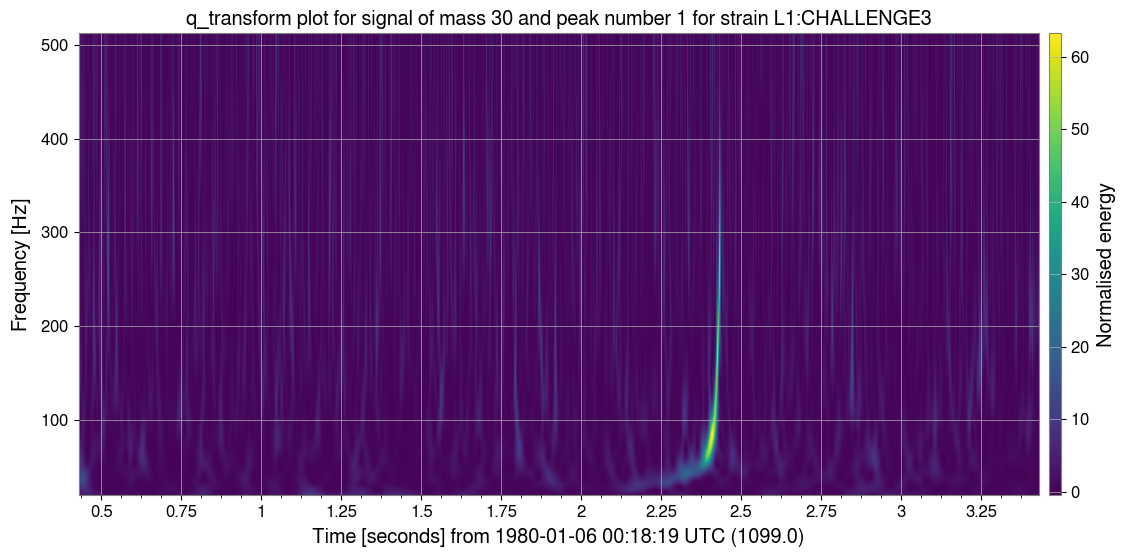

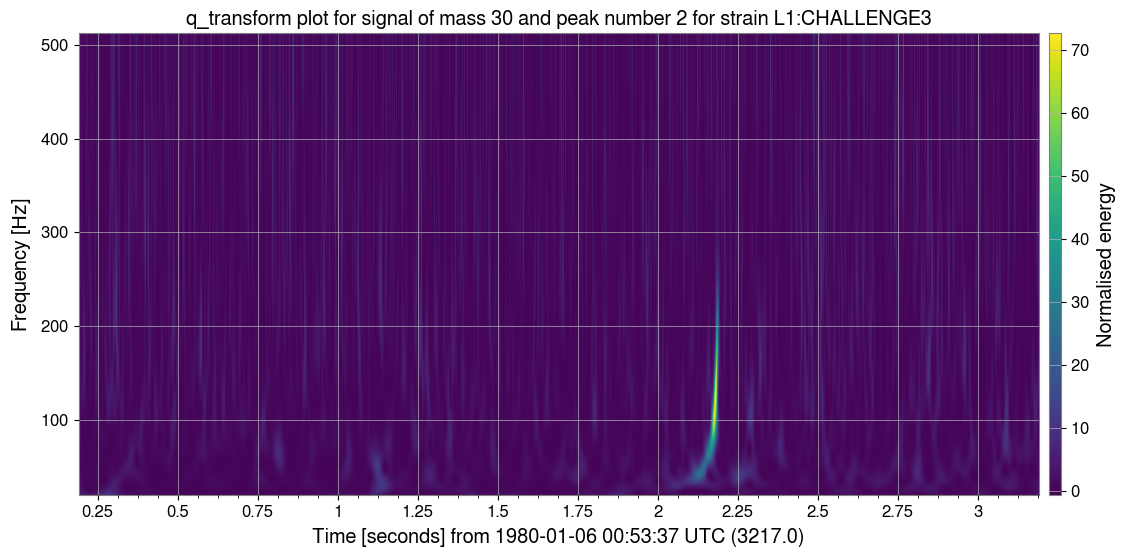

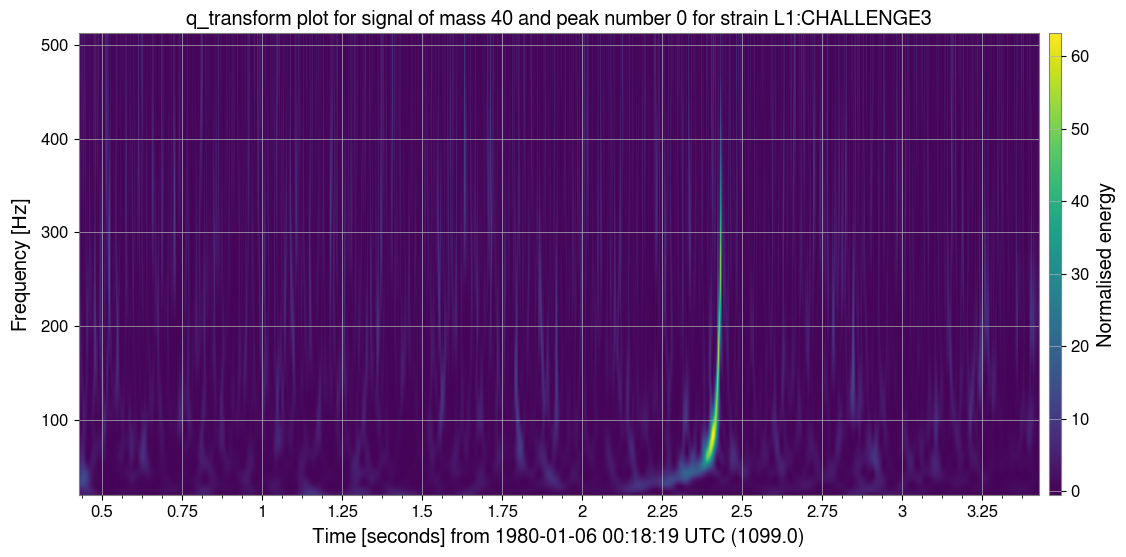

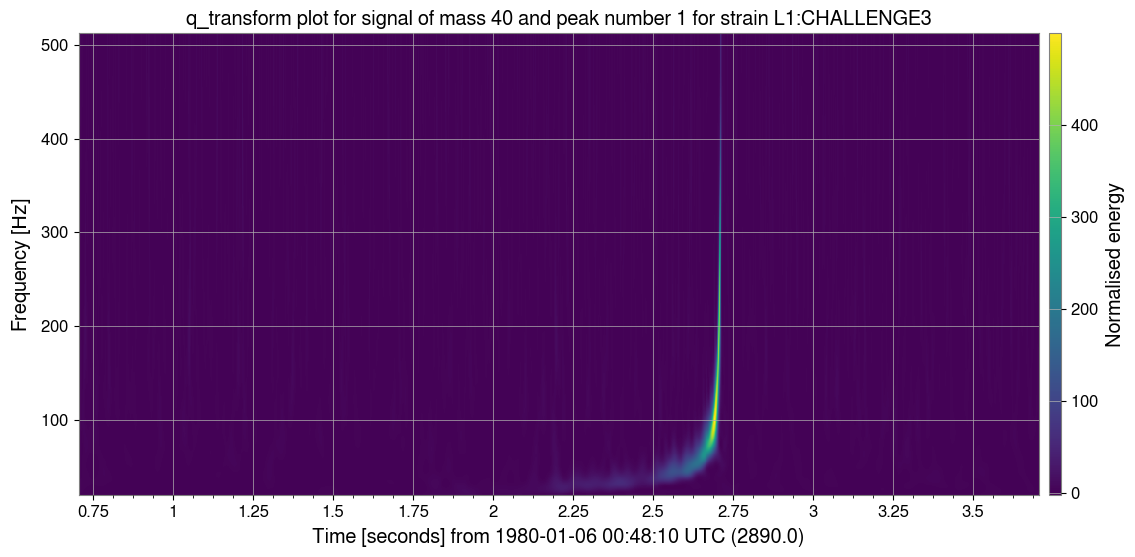

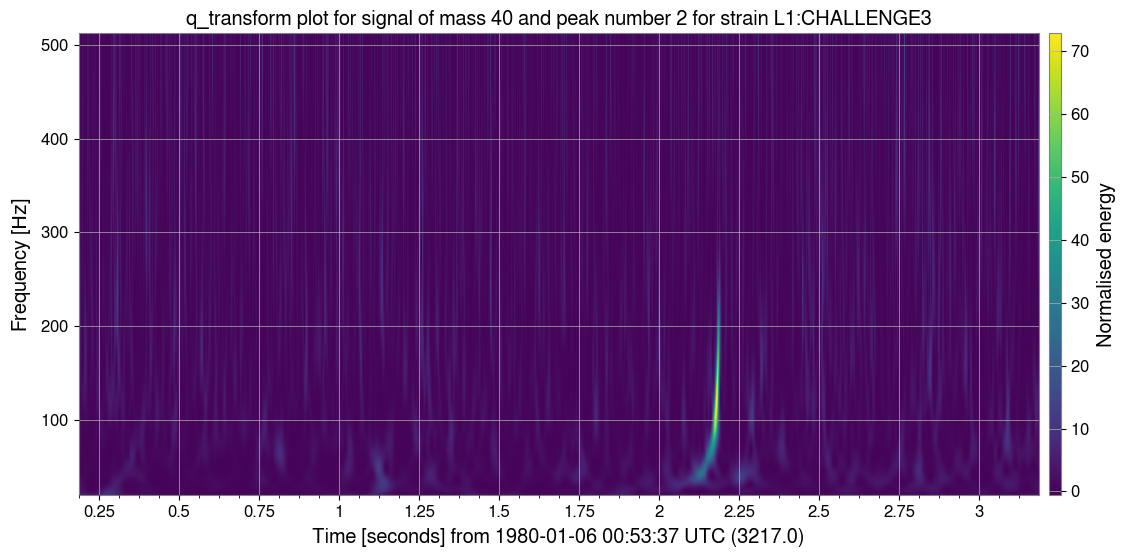

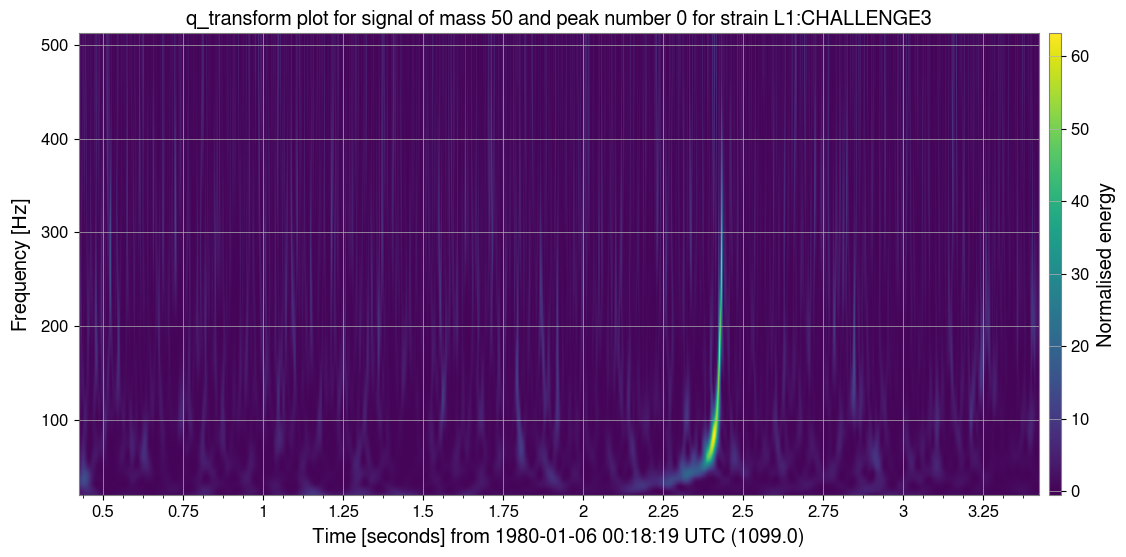

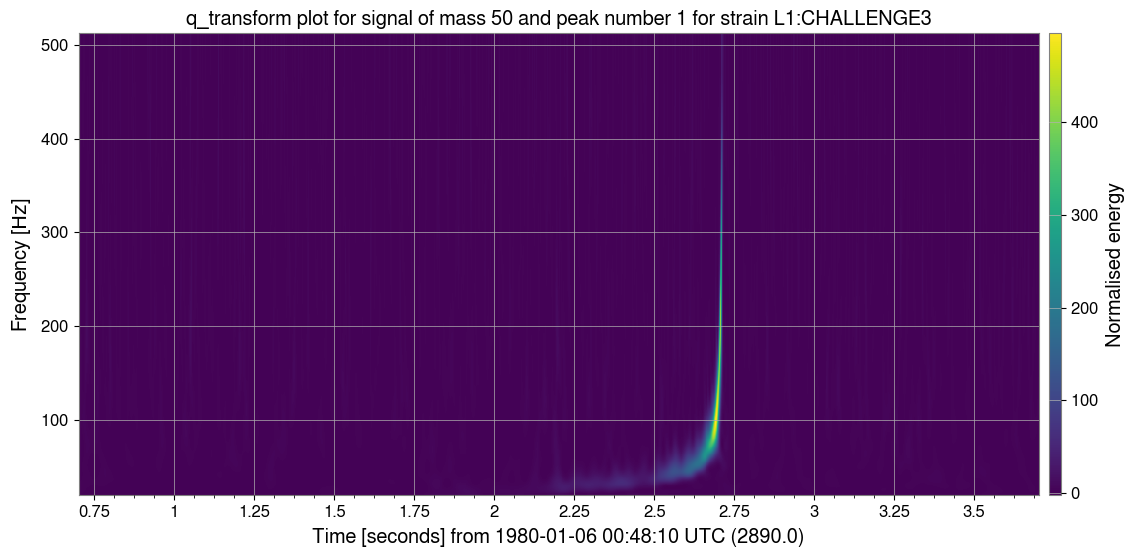

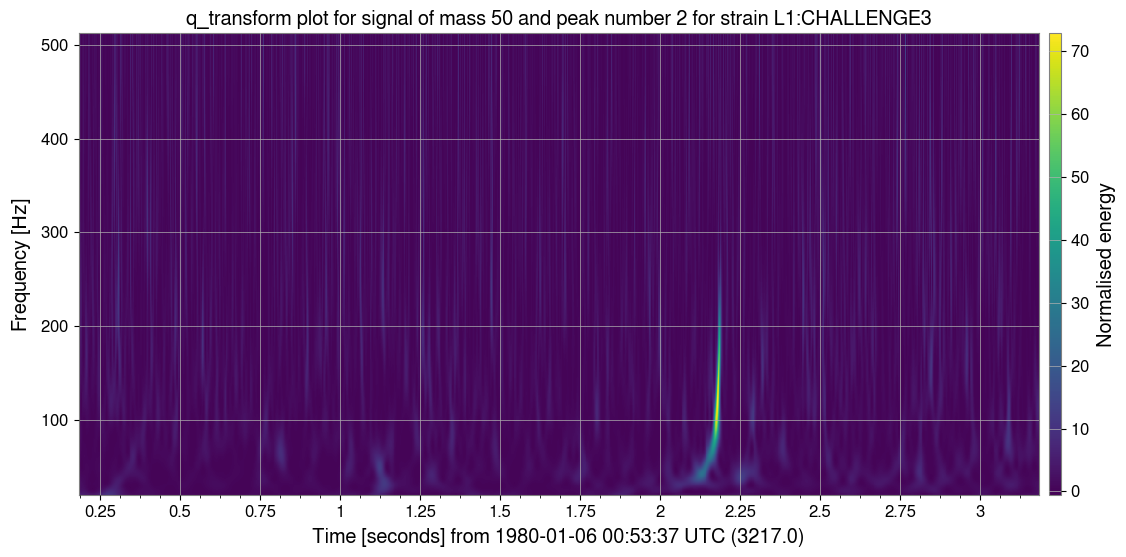

In [15]:
cname = 'L1:CHALLENGE3'

for mass in mass_arr:
    i = 0
    for peak in peak_idx[cname][mass]:
        # plot = H1strain.q_transform(frange=[20,512], outseg=[snr_x[cname][mass].sample_times[peak-window_size],
        #                                                      snr_x[cname][mass].sample_times[peak+window_size]]).plot()
        plot = L1strain.q_transform(frange=[20,512], outseg=[snr_x[cname][mass].sample_times[peak]-2,
                                                             snr_x[cname][mass].sample_times[peak]+1]).plot()
        plot.colorbar(label="Normalised energy")   
        ax = plot.gca()
        ax.set_title(f"q_transform plot for signal of mass {mass} and peak number {i} for strain {cname}")
        i += 1

In [17]:
ptime

{'H1:CHALLENGE3': {10: array([2483.96875]),
  20: array([2892.7109375]),
  30: array([ 826.43066406, 1101.43066406, 2892.70703125,
         3219.19042969]),
  40: array([ 826.42773438, 1101.42773438, 2892.70507812,
         3219.1875    ]),
  50: array([ 826.42480469, 1101.42480469, 2892.70214844,
         3219.18457031])},
 'L1:CHALLENGE3': {10: array([2483.96875]),
  20: array([2892.71191406]),
  30: array([ 826.4296875 , 1101.4296875 , 3219.19042969]),
  40: array([1101.42675781, 2892.70507812, 3219.18652344]),
  50: array([1101.42382812, 2892.70117188, 3219.18359375])}}

In [ ]:
# #? to eradicate nearby points and take end points (indices)
# print(peak_idx['L1:CHALLENGE3'][20])

# # print(np.diff(peak_idx['L1:CHALLENGE3'][20]))

# peak_idxx = []
# peak_idxx.append(peak_idx['L1:CHALLENGE3'][20][0])

# for i in range(len(peak_idx['L1:CHALLENGE3'][20])-1):
#     if np.diff(peak_idx['L1:CHALLENGE3'][20])[i] > 1:
#         peak_idxx.append(peak_idx['L1:CHALLENGE3'][20][i])
#         peak_idxx.append(peak_idx['L1:CHALLENGE3'][20][i+1])

# peak_idxx.append(peak_idx['L1:CHALLENGE3'][20][-1])

# print(peak_idxx)


# print(peak_idx['L1:CHALLENGE3'][20])

# # #? to take the indices of the maxima/peaks
# peak_idxx = []
# for i in range(0, len(peak_idx['L1:CHALLENGE3'][20]), 2):
#     try:
#         tmp_peak_idx = nsnr_x['L1:CHALLENGE3'][20][peak_idx['L1:CHALLENGE3'][20][i]:peak_idx['L1:CHALLENGE3'][20][i+1]].argmax()
#     except:
#         tmp_peak_idx = 0
#     # print(tmp_peak_idx)
#     peak_idxx.append(peak_idx['L1:CHALLENGE3'][20][i]+tmp_peak_idx)

# peak_idxx